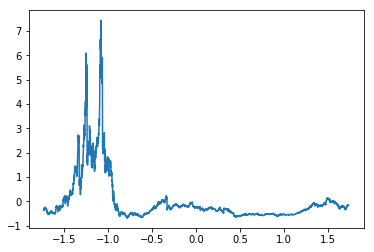

In [6]:
import numpy as np
#from TFANN import ANNR
import matplotlib.pyplot as mpl
from sklearn.preprocessing import scale
 
pth ='yahoostock.csv'
A = np.loadtxt(pth, delimiter=",", skiprows=1, usecols=(1, 4))
A = scale(A)
#y is the dependent variable
y = A[:, 1].reshape(-1, 1)
#A contains the independent variable
A = A[:, 0].reshape(-1, 1)
#Plot the high value of the stock price
mpl.plot(A[:, 0], y[:, 0])
mpl.show()

In [ ]:
#Fit the MLP to the data
#param A: numpy matrix where each row is a sample
#param y: numpy matrix of target values
def fit(self, A, y):
 
#Predict the output given the input (only run after calling fit)
#param A: The input values for which to predict outputs
#return: The predicted output values (one row per input sample)
def predict(self, A):
 
#Predicts the ouputs for input A and then computes the RMSE between
#The predicted values and the actualy values
#param A: The input values for which to predict outputs
#param y: The actual target values
#return: The RMSE
def score(self, A, y):

In [3]:
#Number of neurons in the input layer
i = 1
#Number of neurons in the output layer
o = 1
#Number of neurons in the hidden layers
h = 32
#3 Fully-connected layers with tanh followed by linear output layer 
layers = [('F', h), ('AF', 'tanh'), ('F', h), ('AF', 'tanh'), ('F', h), ('AF', 'tanh'), ('F', o)]
mlpr = ANNR([i], layers, batchSize = 256, maxIter = 1000, tol = 0.2, reg = 1e-4, verbose = True)


NameError: name 'ANNR' is not defined

In [4]:
#Create the MLP variables for TF graph
#_X: The input matrix
#_W: The weight matrices
#_B: The bias vectors
#_AF: The activation function
def _CreateMLP(_X, _W, _B, _AF):
    n = len(_W)
    for i in range(n - 1):
        _X = _AF(tf.matmul(_X, _W[i]) + _B[i])
    return tf.matmul(_X, _W[n - 1]) + _B[n - 1]
 
#Add L2 regularizers for the weight and bias matrices
#_W: The weight matrices
#_B: The bias matrices
#return: tensorflow variable representing l2 regularization cost
def _CreateL2Reg(_W, _B):
    n = len(_W)
    regularizers = tf.nn.l2_loss(_W[0]) + tf.nn.l2_loss(_B[0])
    for i in range(1, n):
        regularizers += tf.nn.l2_loss(_W[i]) + tf.nn.l2_loss(_B[i])
    return regularizers
 
#Create weight and bias vectors for an MLP
#layers: The number of neurons in each layer (including input and output)
#return: A tuple of lists of the weight and bias matrices respectively
def _CreateVars(layers):
    weight = []
    bias = []
    n = len(layers)
    for i in range(n - 1):
        #Fan-in for layer; used as standard dev
        lyrstd = np.sqrt(1.0 / layers[i])
        curW = tf.Variable(tf.random_normal([layers[i], layers[i + 1]], stddev = lyrstd))
        weight.append(curW)
        curB = tf.Variable(tf.random_normal([layers[i + 1]], stddev = lyrstd))
        bias.append(curB)
    return (weight, bias)
 
...
 
#The constructor
#param layers: A list of layer sizes
#param actvFn: The activation function to use: 'tanh', 'sig', or 'relu'
#param learnRate: The learning rate parameter
#param decay: The decay parameter
#param maxItr: Maximum number of training iterations
#param tol: Maximum error tolerated
#param batchSize: Size of training batches to use (use all if None)
#param verbose: Print training information
#param reg: Regularization weight
def __init__(self, layers, actvFn = 'tanh', learnRate = 0.001, decay = 0.9, maxItr = 2000,
             tol = 1e-2, batchSize = None, verbose = False, reg = 0.001):
    #Parameters
    self.tol = tol
    self.mItr = maxItr
    self.vrbse = verbose
    self.batSz = batchSize
    #Input size
    self.x = tf.placeholder("float", [None, layers[0]])
    #Output size
    self.y = tf.placeholder("float", [None, layers[-1]])
    #Setup the weight and bias variables
    weight, bias = _CreateVars(layers)
    #Create the tensorflow MLP model
    self.pred = _CreateMLP(self.x, weight, bias, _GetActvFn(actvFn))
    #Use L2 as the cost function
    self.loss = tf.reduce_sum(tf.nn.l2_loss(self.pred - self.y))
    #Use regularization to prevent over-fitting
    if(reg is not None):
        self.loss += _CreateL2Reg(weight, bias) * reg
    #Use ADAM method to minimize the loss function
    self.optmzr = tf.train.AdamOptimizer(learning_rate=learnRate).minimize(self.loss)


In [4]:
#Length of the hold-out period
nDays = 5
n = len(A)
#Learn the data
mlpr.fit(A[0:(n-nDays)], y[0:(n-nDays)])

NameError: name 'A' is not defined

In [6]:
#Fit the MLP to the data
#param A: numpy matrix where each row is a sample
#param y: numpy matrix of target values
def fit(self, A, y):
    m = len(A)
    #Start the tensorflow session and initializer
    #all variables
    self.sess = tf.Session()
    init = tf.initialize_all_variables()
    self.sess.run(init)
    #Begin training
    for i in range(self.mItr):
        #Batch mode or all at once
        if(self.batSz is None):
            self.sess.run(self.optmzr, feed_dict={self.x:A, self.y:y})
        else:
            for j in range(0, m, self.batSz):
                batA, batY = _NextBatch(A, y, j, self.batSz)
                self.sess.run(self.optmzr, feed_dict={self.x:batA, self.y:batY})
        err = np.sqrt(self.sess.run(self.loss, feed_dict={self.x:A, self.y:y}) * 2.0 / m)
        if(self.vrbse):
            print("Iter " + str(i + 1) + ": " + str(err))
        if(err < self.tol):
            break

In [ ]:
#Begin prediction
yHat = mlpr.predict(A)
#Plot the results
mpl.plot(A, y, c='#b0403f')
mpl.plot(A, yHat, c='#5aa9ab')
mpl.show()